<a href="https://colab.research.google.com/github/matteoalberti/Lectures_introML_Experis2020/blob/master/Day1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Welcome!**

## Introduction to Machine Learning



## **Lecturer :** Matteo Alberti

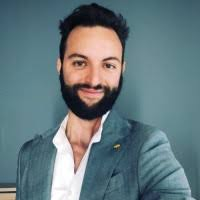

*Contacts :* https://www.linkedin.com/in/matteo-alberti-170493/


## Introduction to Supervised and Unsupervised Machine Learning

![](https://www.diegocalvo.es/wp-content/uploads/2018/09/machine-learning-classification.png)


## Introduction to Linear and Logistic Regression Problem

***Don't worry.. this will be the only formula that we'll use today***

$$y=f(x)$$

technically :

$$y=a + b*X + e$$

The model is defined in terms of parameters called coefficients (beta), where there is one coefficient per input and an additional coefficient that provides the intercept or bias.

For example, a problem with inputs X with m variables x1, x2, …, xm will have coefficients beta1, beta2, …, betam and beta0. A given input is predicted as the weighted sum of the inputs for the example and the coefficients.


$$yhat = alfa + beta_1 * x_1 + beta_2 * x_2 + … + beta_p * x_p + error$$

## An example of linear regression

![](https://miro.medium.com/max/700/1*2VBMHbTdBI4cNozHhpTa0Q.png)

*More realistic one (2-d)*
![](https://upload.wikimedia.org/wikipedia/commons/thumb/3/3a/Linear_regression.svg/1200px-Linear_regression.svg.png)

## what do we minimize?

![](https://www.statisticshowto.com/wp-content/uploads/2015/03/residual.png)

* the idea of Simple Linear Regression is finding those parameters α and β for which the error term is minimized. (**squared errors**)*

![](https://miro.medium.com/max/443/1*7rSwjrW1pDS0V-Ag-zNL-Q.png)



## When don't we have a linear relationship between variables?

![](https://i.stack.imgur.com/uB7pm.png)



$$y=f(x)$$

$$y= alfa + beta_1 * x^2 +. . . .e$$

### Models too simple or too complex?

![](https://miro.medium.com/max/1125/1*_7OPgojau8hkiPUiHoGK_w.png)

## Variance vs Bias

- **High variance** means that your estimator (or learning algorithm) varies a lot depending on the data that you give it. If you algorithm is able to fit your data extremely well every single time and even a single data point perturbation changes the algorithm a lot then the algorithm is has high variance. This type of high variance is called **overfitting**.

  - your algorithm is probably not robust to noise (**low bias**)

- **Underfitting** usually arises because you want your algorithm to be somewhat stable. (**High bias and low variance**)

  - This usually results in bad train and test errors (BOTH!)


### Load Packages

In [89]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt 
import seaborn as sns 

import sklearn.model_selection as model_selection
from sklearn.preprocessing import StandardScaler

%matplotlib inline

## From zero to Linear Regression 

- Data Loading

- Data Preparation

- Understand the task! Supervised, Unsupervised Learning?

- Assumptions & Models

- Metrics and Evaluation

- Test yourself!



## First Exapled (GUIDED!)

*The Boston Housing Dataset consists of price of houses in various places in Boston. Alongside with price, the dataset also provide information such as Crime (CRIM), areas of non-retail business in the town (INDUS), the age of people who own the house (AGE), and there are many other attributes that available here*

### Boston house dataset

- CRIM: Per capita crime rate by town
- ZN: Proportion of residential land zoned for lots over 25,000 sq. ft
- INDUS: Proportion of non-retail business acres per town
- CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
- NOX: Nitric oxide concentration (parts per 10 million)
- RM: Average number of rooms per dwelling
- AGE: Proportion of owner-occupied units built prior to 1940
- DIS: Weighted distances to five Boston employment centers
- RAD: Index of accessibility to radial highways
- TAX: Full-value property tax rate per 10,000$$
- PTRATIO: Pupil-teacher ratio by town
- B: 1000(Bk — 0.63)², where Bk is the proportion of [people of African American descent] by town
- LSTAT: Percentage of lower status of the population
- MEDV: Median value of owner-occupied homes in $1000s

### Translated

- CRIM: tasso di criminalità pro capite per città
- ZN: Proporzione di terreno residenziale suddiviso in zone per lotti superiori a 25.000 piedi quadrati
- INDUS: proporzione di acri di attività commerciali non al dettaglio per città
- CHAS: variabile fittizia Charles River (= 1 se il tratto confina con il fiume; 0 altrimenti)
- NOX: concentrazione di ossido nitrico (parti per 10 milioni)
- RM: numero medio di stanze per abitazione
- ETÀ: Proporzione di unità abitate dai proprietari costruite prima del 1940
- DIS: distanze ponderate da cinque centri per l'impiego di Boston
- RAD: Indice di accessibilità alle autostrade radiali
- TASSA: aliquota dell'imposta sulla proprietà a valore intero per 10.000 $$
- PTRATIO: rapporto alunni-insegnanti per città
- B: 1000 (Bk - 0.63) ², dove Bk è la proporzione di [persone di discendenza afroamericana] per città
- LSTAT: percentuale di status inferiore della popolazione
- MEDV: valore medio delle case occupate dai proprietari in $ 1000

In [1]:
from sklearn.datasets import load_boston
boston_dataset = load_boston()

In [ ]:
print(boston_dataset.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])


In [11]:
boston = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [12]:
# Which is the shape of our data?

boston.shape

(506, 13)

In [17]:
# What about the target?

boston['MEDV'] = boston_dataset.target
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


### Data Preprocessing

***what should I check about my data?***


In [19]:
# There are any missing values? Look dropna function!

boston.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

## EDA and Assumptions

- Most statistical tests rest upon the assumption of normality.
- Tests that rely upon the assumption or normality are called parametric tests

*We can easly say that this is parametric . . .*
- $y=a + b*X + e$


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


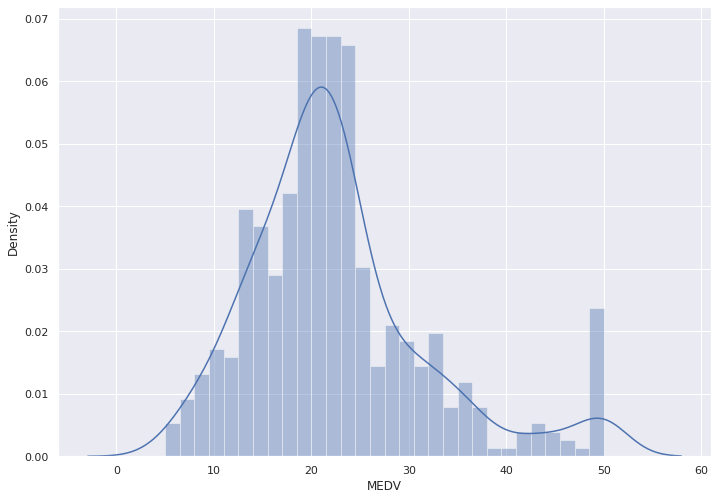

In [20]:

# What is EDA? Exploratory Data Analysis, in this case : looking for the relationship of the target variable with other features.

sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(boston['MEDV'], bins=30)
plt.show()

*What Should I see from this plot??*

- Data distribution!


### Normal Distribution

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0, 0.5, 'Frequency'), Text(0.5, 0, 'Normal Distribution')]

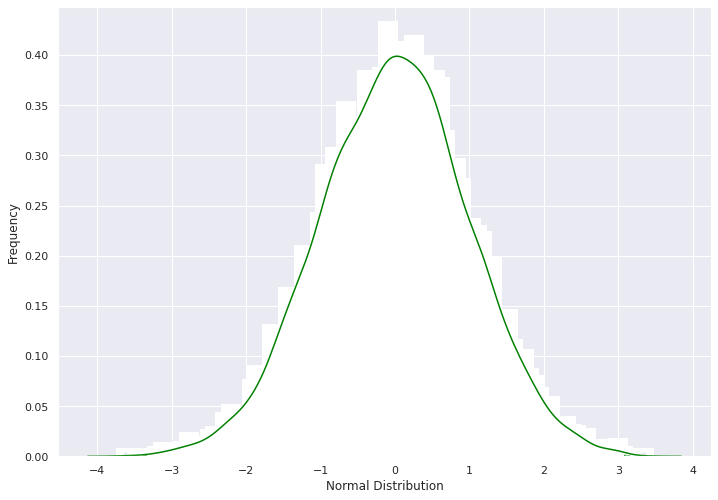

In [21]:
from scipy.stats import norm

# generate random numbers from N(0,1)
data_normal = norm.rvs(size=10000,loc=0,scale=1)

ax = sns.distplot(data_normal,
                  bins=100,
                  kde=True,
                  color='green',
                  hist_kws={"linewidth": 15,'alpha':1})

ax.set(xlabel='Normal Distribution', ylabel='Frequency')

There are many other distributions...

*Poisson, Binomial, Trinomial, Gamma, Exponential, Bernulli, . . . .*

**But what does it mean converge into a distribution?**

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0, 0.5, 'Frequency'), Text(0.5, 0, 'Bernoulli Distribution')]

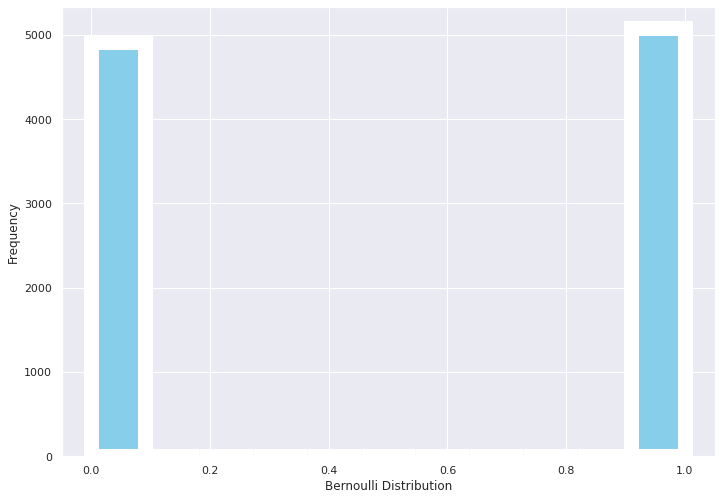

In [24]:
# Bernulli Example

# A Bernoulli distribution has only two possible outcomes, namely 1 (success) and 0 (failure)  | TESTA O CROCE!

from scipy.stats import bernoulli
data_bern = bernoulli.rvs(size=10000,p=0.5)

ax= sns.distplot(data_bern,
                 kde=False,
                 color="skyblue",
                 hist_kws={"linewidth": 15,'alpha':1})

ax.set(xlabel='Bernoulli Distribution', ylabel='Frequency')



Come back to our Boston Data set!


***How can I check if normality is satisfied?***

- Graphical tests
- Shapiro Wilk test



/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


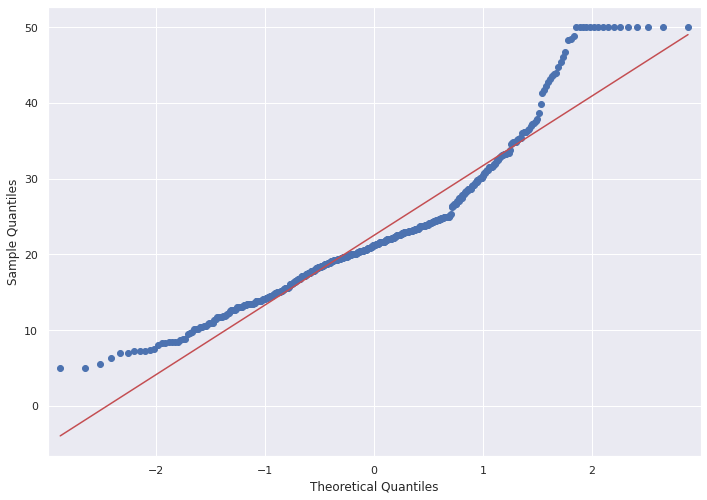

In [25]:
from statsmodels.graphics.gofplots import qqplot

qqplot(boston['MEDV'], line='s')
plt.show()

### Which are our Outliers?

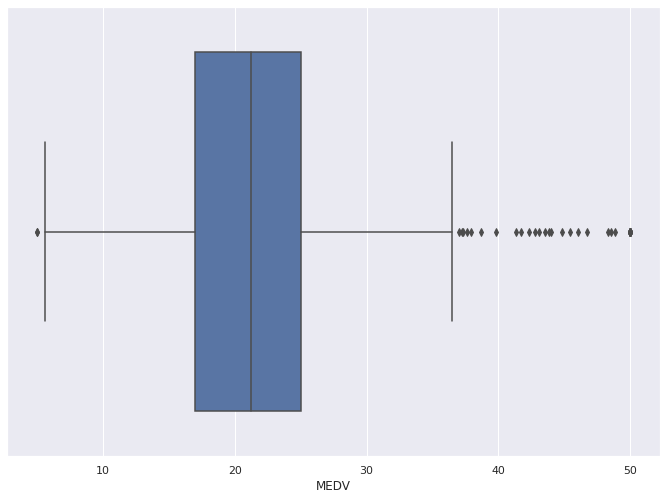

In [26]:
## Suggestion! But consider that creativity is your best tool!

sns.boxplot(x=boston['MEDV']) 


#### When you finish you can test with the above functions or use the a no-grafical test

In [27]:
# Shapiro-Wilk Test

from scipy.stats import shapiro

stat, p = shapiro(boston['MEDV'])
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

Statistics=0.917, p=0.000
Sample does not look Gaussian (reject H0)


*We will came back later on this . . .*

## Multi-collinearity

Multicollinearity happens when independent variables in the regression model are highly correlated to each other. It makes it hard for interpretation of model and also creates overfitting problem.

**But the main problem is the following :**

- When independent variables are highly correlated, change in one variable would cause change to another and so the model results fluctuate significantly.


### Correlation Matrix

Next, we create a correlation matrix that measures the linear relationships between the variables. The correlation matrix can be formed by using the corr function from the pandas dataframe library. We will use the heatmap function from the seaborn library to plot the correlation matrix.


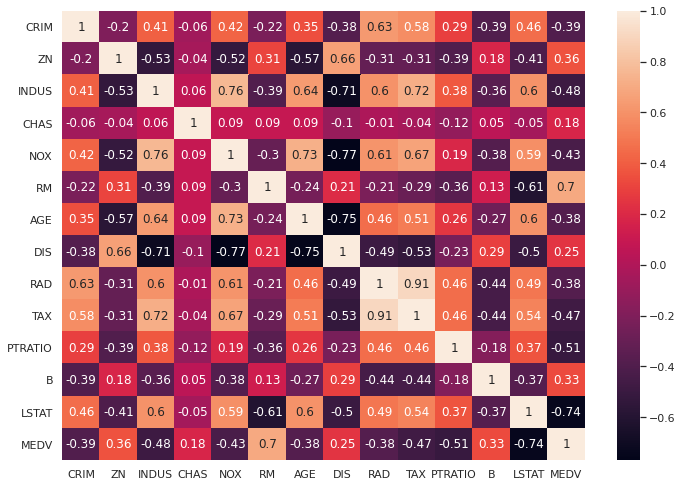

In [28]:
correlation_matrix = boston.corr().round(2)
# annot = True to print the values inside the square
sns.heatmap(data=correlation_matrix, annot=True)

*Which is the Correlation Matrix range?*

- from : -1
- to : 1




*Which features will we select?*

*Multi-Collinearity?*


## Homoschedasticity

![](https://miro.medium.com/max/700/1*V-ZwpBFum-jP710q_fyjBA.png)

- Often occurs in those data sets which have a large range between the largest and the smallest observed values i.e. when there are outliers.
- When model is not correctly specified.
- If observations are mixed with different measures of scale.
- When incorrect transformation of data is used to perform the regression.
Skewness in the distribution of a regressor, and may be some other sources.

### Show the final Dataframe with all the selected columns

In [29]:
# select by name df=[[]] | select by .iloc func

boston2 = boston.copy()

boston2 = boston2[['LSTAT', 'PTRATIO', 'RM', 'INDUS', 'CRIM', 'MEDV']]

boston2.head()

,LSTAT,PTRATIO,RM,INDUS,CRIM,MEDV
0,4.98,15.3,6.575,2.31,0.00632,24.0
1,9.14,17.8,6.421,7.07,0.02731,21.6
2,4.03,17.8,7.185,7.07,0.02729,34.7
3,2.94,18.7,6.998,2.18,0.03237,33.4
4,5.33,18.7,7.147,2.18,0.06905,36.2


## Data Splitting

There are lots of ways to split our data and lots of packages

- Divided manually
- build-in function inside sklearn
  - train_test_val
  - . . . 


And also depend on data type / dataset size


In [ ]:
training = boston2[:round(boston2.shape[0]/100*70),:]
test = boston2[round(boston2.shape[0]/100*70)+1:,:]

In [ ]:
print(training.shape, test.shape, training.shape[0] + test.shape[0])

(354, 6) (152, 6) 506


In [ ]:
#boston2.iloc[:,-1]

#boston2[['MEDV']]

In [47]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(boston2[['LSTAT', 'PTRATIO', 'RM', 'INDUS', 'CRIM']], 
                                                                    boston2.iloc[:,-1], 
                                                                    train_size=0.7,
                                                                    test_size=0.3, random_state=10)

In [46]:
print ("Original: ", boston2.shape, "\n")

print ("X_train: ", X_train.shape)
print ("y_train: ", y_train.shape)

print("X_test: ", X_test.shape)
print ("y_test: {} \n ".format(y_test.shape))

print ("Reconstruct X : ", X_train.shape[0] + X_test.shape[0])

# Check also Y

Original:  (506, 6) 

X_train:  (354, 5)
y_train:  (354,)
X_test:  (152, 5)
y_test: (152,) 
 
Reconstruct X :  506


### K-fold cross-validation

![](https://static.packt-cdn.com/products/9781789617740/graphics/b04c27c5-7e3f-428a-9aa6-bb3ebcd3584c.png)

## Model Definition & Traning

In [ ]:
boston2.head()

,LSTAT,PTRATIO,RM,INDUS,CRIM,MEDV
0,4.98,15.3,6.575,2.31,0.00632,24.0
1,9.14,17.8,6.421,7.07,0.02731,21.6
2,4.03,17.8,7.185,7.07,0.02729,34.7
3,2.94,18.7,6.998,2.18,0.03237,33.4
4,5.33,18.7,7.147,2.18,0.06905,36.2


In [51]:
from sklearn.linear_model import LinearRegression

# Fitting the model
boston_model = LinearRegression()

boston_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [52]:
### How do I evaluate my model?  P.s. look at .score funcion ok sklearn!

# Returning the R^2 for the model

boston_r2 = boston_model.score(X_test, y_test)


print('R^2: {0}'.format(boston_r2))

R^2: 0.6730386181763135


### We have lots of metrics of evaluation 

*Let me show you the most relevant*

- Mean Squared Error**(MSE)**        

$$ MSE = \frac {\sum (y - y_{hat})^2}{N} $$

it penalizes even a small error which leads to over-estimation of how bad the model is

- Root-Mean-Squared-Error**(RMSE)**

$$ RMSE = \sqrt \frac {\sum (y - y_{hat})^2}{N} $$

This implies that RMSE is useful when large errors are undesired.

- Mean-Absolute-Error**(MAE)**

$$ MSE = \frac {\sum |y - y_{hat}|}{N} $$

The MAE is more robust to outliers and does not penalize the errors as extremely as mse




- **R²** or Coefficient of Determination.

*Question :* which is the range of $R^2$? Why?

- **Adjusted R²**

As $R^2$ but penalize too variables

## Question from your manager : Which features are the most relevant?


Feature: 0, Score: -0.55951
Feature: 1, Score: -0.82292
Feature: 2, Score: 4.24762
Feature: 3, Score: 0.00843
Feature: 4, Score: -0.09805


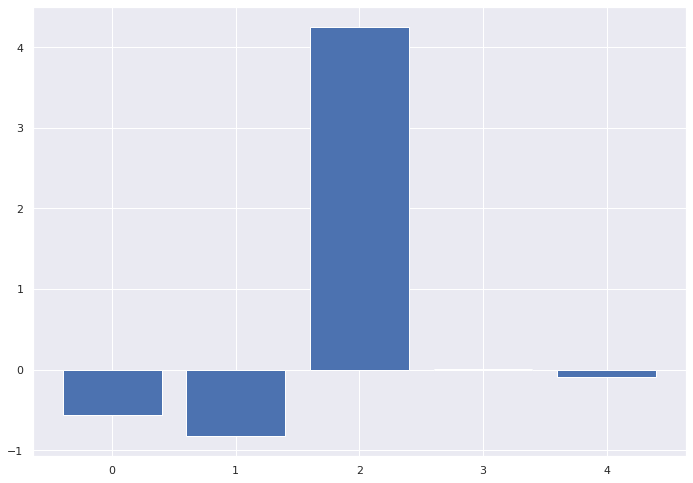

In [53]:
importance = boston_model.coef_  ## What is .coef???

# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
 
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

## Now.. Try to predict!

# BREAK!!

Do yourself on another dataset!

**Need a suggest?**

- Try with : **load_diabetes**
- Try with : **Kaggle**  : www.kaggle.com

OR . . . follow this tutorial




Do you want any good reference for learning in easy and good way?

- https://machinelearningmastery.com/

# Or we can make it a bit more complex!

### Load Data

In [78]:
df_flights = pd.read_csv('https://raw.githubusercontent.com/ismayc/pnwflights14/master/data/flights.csv')

In [65]:
df_flights.head()

,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time,distance,hour,minute
0,2014,1,1,1.0,96.0,235.0,70.0,AS,N508AS,145,PDX,ANC,194.0,1542,0.0,1.0
1,2014,1,1,4.0,-6.0,738.0,-23.0,US,N195UW,1830,SEA,CLT,252.0,2279,0.0,4.0
2,2014,1,1,8.0,13.0,548.0,-4.0,UA,N37422,1609,PDX,IAH,201.0,1825,0.0,8.0
3,2014,1,1,28.0,-2.0,800.0,-23.0,US,N547UW,466,PDX,CLT,251.0,2282,0.0,28.0
4,2014,1,1,34.0,44.0,325.0,43.0,AS,N762AS,121,SEA,ANC,201.0,1448,0.0,34.0


## 1.2  Step 2. Check the number of rows and columns and print column names

In [ ]:
df_flights.shape

(162049, 16)

In [ ]:
df_flights.columns

Index(['year', 'month', 'day', 'dep_time', 'dep_delay', 'arr_time',
       'arr_delay', 'carrier', 'tailnum', 'flight', 'origin', 'dest',
       'air_time', 'distance', 'hour', 'minute'],
      dtype='object')

## 1.3  Step 3. Print last 5 rows of the dataset.


In [4]:
df_flights.tail(5)

,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time,distance,hour,minute
162044,2014,9,30,2357.0,-2.0,545.0,-20.0,UA,N477UA,479,PDX,IAH,210.0,1825,23.0,57.0
162045,2014,9,30,2359.0,4.0,734.0,-1.0,DL,N137DL,1929,SEA,ATL,244.0,2182,23.0,59.0
162046,2014,9,30,NaN,NaN,NaN,NaN,AS,N530AS,470,SEA,SAN,NaN,1050,NaN,NaN
162047,2014,9,30,NaN,NaN,NaN,NaN,US,NaN,494,PDX,PHX,NaN,1009,NaN,NaN
162048,2014,9,30,NaN,NaN,NaN,NaN,WN,N790SW,427,SEA,SMF,NaN,605,NaN,NaN


## 1.4  Step 4. Transpose the frame to see all columns at once

    TIPS : google it : "how to transpose pandas dataframe"

In [5]:
df_flights.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,162009,162010,162011,162012,162013,162014,162015,162016,162017,162018,162019,162020,162021,162022,162023,162024,162025,162026,162027,162028,162029,162030,162031,162032,162033,162034,162035,162036,162037,162038,162039,162040,162041,162042,162043,162044,162045,162046,162047,162048
year,2014,2014,2014,2014,2014,2014,2014,2014,2014,2014,2014,2014,2014,2014,2014,2014,2014,2014,2014,2014,2014,2014,2014,2014,2014,2014,2014,2014,2014,2014,2014,2014,2014,2014,2014,2014,2014,2014,2014,2014,...,2014,2014,2014,2014,2014,2014,2014,2014,2014,2014,2014,2014,2014,2014,2014,2014,2014,2014,2014,2014,2014,2014,2014,2014,2014,2014,2014,2014,2014,2014,2014,2014,2014,2014,2014,2014,2014,2014,2014,2014
month,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,...,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9
day,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,...,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30
dep_time,1,4,8,28,34,37,346,526,527,536,541,549,550,557,557,558,559,600,600,602,602,603,603,606,606,614,617,618,619,620,622,623,624,629,630,632,637,637,638,638,...,2030,2034,2035,2044,2045,2050,2059,2102,2107,2114,2115,2119,2127,2130,2139,2157,2209,2225,2228,2239,2244,2245,2245,2248,2255,2257,2303,2317,2320,2325,2326,2336,2344,2347,2349,2357,2359,NaN,NaN,NaN
dep_delay,96,-6,13,-2,44,82,227,-4,7,1,1,24,0,-3,-3,-2,-1,0,-10,-3,-3,-2,-3,-4,6,-1,2,-2,-6,-2,2,13,-6,-9,-10,-3,-8,-3,-2,10,...,0,-6,-10,-6,0,-10,44,-3,-2,-11,0,-11,-3,-14,-1,-2,-1,-10,-2,-1,-6,0,-2,0,-5,-3,-7,-3,20,0,-4,124,-1,-3,-1,-2,4,NaN,NaN,NaN
arr_time,235,738,548,800,325,747,936,1148,917,1334,911,907,837,1134,825,801,916,1151,842,943,1204,755,1202,806,746,850,850,1135,822,905,1412,1218,1401,1014,834,1235,858,854,1003,1408,...,2249,2308,2238,2242,2345,2234,2303,2218,524,2301,2200,546,29,551,2228,616,607,124,2311,435,711,652,607,433,145,604,200,732,10,446,513,729,527,229,514,545,734,NaN,NaN,NaN
arr_delay,70,-23,-4,-23,43,88,219,15,24,-6,4,12,-12,-16,-25,-2,-9,-19,-8,5,7,-17,-2,-19,3,-2,-12,-30,-7,0,-19,-4,-6,-1,-14,5,-7,-6,-5,-4,...,-9,-6,-21,-16,11,-21,22,-12,9,-14,-7,8,18,0,-10,2,9,-3,-7,-25,12,27,-15,-5,7,-9,0,19,16,-19,-5,116,-5,-2,-19,-20,-1,NaN,NaN,NaN
carrier,AS,US,UA,US,AS,DL,UA,UA,UA,UA,UA,US,DL,AA,AS,AS,F9,AA,AS,F9,UA,AS,UA,AS,AS,AS,AS,AA,VX,OO,UA,UA,DL,UA,OO,WN,AS,AS,AS,UA,...,AS,AS,AS,AS,AS,AS,OO,WN,B6,AS,OO,B6,AS,UA,AS,DL,US,AS,AS,UA,B6,DL,DL,UA,AS,DL,AS,UA,AS,AA,UA,UA,UA,AS,AS,UA,DL,AS,US,WN
tailnum,N508AS,N195UW,N37422,N547UW,N762AS,N806DN,N14219,N813UA,N75433,N574UA,N36476,N548UW,N660DL,N3JLAA,N562AS,N402AS,N210FR,N3JFAA,N786AS,N201FR,N77295,N577AS,N37290,N525AS,N796AS,N607AS,N579AS,N4XMAA,N841VA,N804SK,N36472,N72405,N617DL,N566UA,N219AG,N8302F,N408AS,N588AS,N508AS,N526UA,...,N587AS,N622AS,N791AS,N590AS,N462AS,N469AS,N816SK,N7735A,N804JB,N527AS,N810SK,N526JB,N317AS,N462UA,N799AS,N655DL,N199UW,N461AS,N583AS,N37408,N523JB,N130DL,N6716C,N18223,N318AS,N374DA,N618AS,N27421,N713AS,N3JKAA,N38473,N38443,N33286,N763AS,N409AS,N477UA,N137DL,N530AS,NaN,N790SW
flight,145,1830,1609,466,121,1823,1481,229,1576,478,1569,649,1634,1094,81,200,796,2240,426,144,1573,344,1136,308,406,524,494,1650,751,4693,1021,1101,968,883,3456,3694,560,572,646,250,...,458,636,566,624,141,350,4789,4816,1206,384,4612,264,731,554,694,1542,624,143,412,1129,498,1629,2497,1167,119,761,127,1246,698,1230,1538,1695,1215,121,660,479,1929,470,494,427


## 1.5  Step 5. Examine data types of all features and total dataframe size in memory

In [12]:
df_flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162049 entries, 0 to 162048
Data columns (total 16 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   year       162049 non-null  int64  
 1   month      162049 non-null  int64  
 2   day        162049 non-null  int64  
 3   dep_time   161192 non-null  float64
 4   dep_delay  161192 non-null  float64
 5   arr_time   161061 non-null  float64
 6   arr_delay  160748 non-null  float64
 7   carrier    162049 non-null  object 
 8   tailnum    161801 non-null  object 
 9   flight     162049 non-null  int64  
 10  origin     162049 non-null  object 
 11  dest       162049 non-null  object 
 12  air_time   160748 non-null  float64
 13  distance   162049 non-null  int64  
 14  hour       161192 non-null  float64
 15  minute     161192 non-null  float64
dtypes: float64(7), int64(5), object(4)
memory usage: 19.8+ MB


## 1.6  Step 6. Get basic statistics of each column

In [15]:
df_flights.describe().T

,count,mean,std,min,25%,50%,75%,max
year,162049.0,2014.000000,0.000000,2014.0,2014.0,2014.0,2014.0,2014.0
month,162049.0,6.605027,3.324399,1.0,4.0,7.0,9.0,12.0
day,162049.0,15.749890,8.789417,1.0,8.0,16.0,23.0,31.0
dep_time,161192.0,1278.283755,522.583793,1.0,831.0,1217.0,1721.0,2400.0
dep_delay,161192.0,6.133859,29.112035,-37.0,-5.0,-2.0,5.0,1553.0
arr_time,161061.0,1482.501282,523.958781,1.0,1127.0,1517.0,1918.0,2400.0
arr_delay,160748.0,2.240868,31.191037,-67.0,-12.0,-4.0,7.0,1539.0
flight,162049.0,1357.356725,1495.271031,2.0,408.0,694.0,1726.0,6527.0
air_time,160748.0,152.588511,72.547469,18.0,103.0,129.0,199.0,422.0
distance,162049.0,1204.514634,653.150062,93.0,689.0,991.0,1660.0,2724.0


## 1.7  Step 7. Count **unique** Carriers and plot their relative share of flights

    TIPS : pandas.Series.plot()

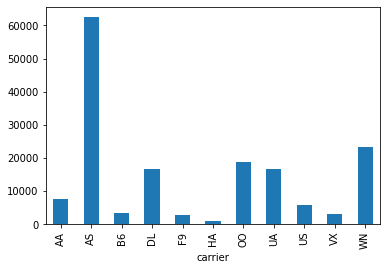

In [32]:
df_flights.groupby('carrier').size().plot(kind='bar')

## 1.8  Step 8. Find the top-5 flight codes, that have the largest total distance travelled in year 2014


    Tips : use .groupby and sum. remember to sort! 

In [66]:
df_flights.groupby('flight')['distance'].sum().sort_values(ascending=False).iloc[:5]

flight
498     1123353
598     1080871
843      985609
851      977972
2237     977674
Name: distance, dtype: int64

## 1.9  Step 9 Making a histogram of flight frequency by date

    Tips : You have to develop a new column.... datetime! use pd.datetime function. Set the new column as index 


In [79]:
df_flights['Date'] =pd.to_datetime(df_flights[['year', 'month', 'day', 'hour', 'minute']])
df_flights = df_flights.set_index('Date')
df_flights.head()

,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time,distance,hour,minute
Date,,,,,,,,,,,,,,,,
2014-01-01 00:01:00,2014,1,1,1.0,96.0,235.0,70.0,AS,N508AS,145,PDX,ANC,194.0,1542,0.0,1.0
2014-01-01 00:04:00,2014,1,1,4.0,-6.0,738.0,-23.0,US,N195UW,1830,SEA,CLT,252.0,2279,0.0,4.0
2014-01-01 00:08:00,2014,1,1,8.0,13.0,548.0,-4.0,UA,N37422,1609,PDX,IAH,201.0,1825,0.0,8.0
2014-01-01 00:28:00,2014,1,1,28.0,-2.0,800.0,-23.0,US,N547UW,466,PDX,CLT,251.0,2282,0.0,28.0
2014-01-01 00:34:00,2014,1,1,34.0,44.0,325.0,43.0,AS,N762AS,121,SEA,ANC,201.0,1448,0.0,34.0


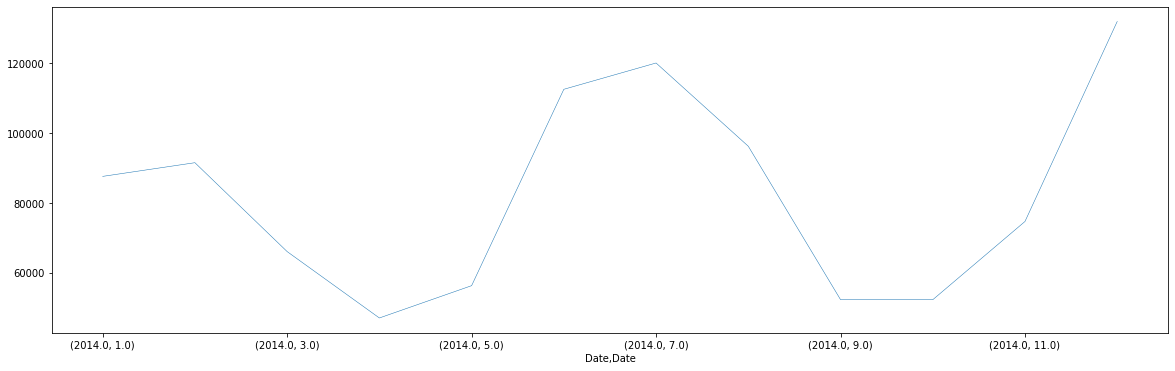

In [72]:
plt.figure(figsize=(20,6))
df_flights_M = df_flights.groupby([(df_flights.index.year),(df_flights.index.month)]).sum()
df_flights_M['dep_delay'].plot(linewidth=0.5)
plt.show()

## 1.9_bis  Step 9_bis Number of flights by days of month and day of the week

    Tips : use pd.crosstab


In [80]:
df_flights['DayOfWeek'] = df_flights.index.dayofweek

In [51]:
pd.crosstab(df_flights.month, df_flights.DayOfWeek)

DayOfWeek,0.0,1.0,2.0,3.0,4.0,5.0,6.0
month,,,,,,,
1,1596,1457,1926,2041,2030,1374,1521
2,1616,1522,1558,1611,1623,1312,1480
3,2148,1650,1691,1733,1726,1835,2077
4,1794,2145,2207,1809,1808,1503,1747
5,1869,1819,1859,2350,2366,1982,1726
6,2535,2001,2018,2031,2039,1831,2460
7,2082,2548,2589,2629,1986,1883,2037
8,2127,2074,2093,2140,2672,2366,2527
9,2359,2237,1819,1854,1847,1528,1816


## 1.10  Step 10. Plot flight distance day of the week + month histogram

    Question : can we extract any relevant information?


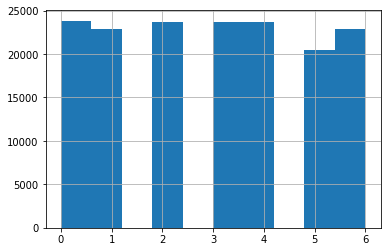

In [52]:
df_flights.DayOfWeek.hist()

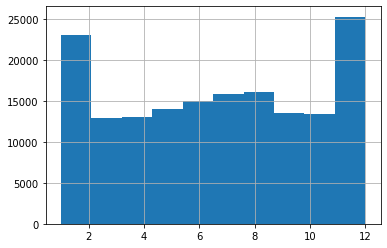

In [53]:
df_flights.month.hist()

## 1.14  Step 14. Which route is the most frequent, in terms of the number of flights?

In [73]:
df_flights.groupby('origin')['dest'].value_counts().sort_values(ascending=False)[:1]

origin  dest
SEA     SFO     7630
Name: dest, dtype: int64

## 1.15  Step 15. Find top-5 delayed routes (count how many times they were delayed on departure) 

*From all flights on these 5 routes, count all flights with weather conditions *contributing to a delay.

In [74]:
df_flights[df_flights['dep_delay'] > 0].groupby(['origin','dest'])['dep_delay'].count().sort_values(ascending=False).iloc[:5]

origin  dest
SEA     SFO     3206
        ANC     2501
        DEN     2387
        LAX     2317
PDX     SFO     1972
Name: dep_delay, dtype: int64

## 1.16  Step 16 Examine the hourly distribution of departure times (use also plots if needed)

*For that, create a new series from DepTime, removing missing values*

    Choose all correct statements:

    - Flights are normally distributed within time interval [0-23] (Search for: Normal distribution, bell curve).
    - Flights are uniformly distributed within time interval [0-23].
    - In the period from 0 am to 4 am there are considerably less flights than from 7 pm to 8 pm.


    TIPS : this is a bit complex : use apply function + value_counts

In [81]:
df_flights['dep_time'] = df_flights['dep_time'].apply(lambda x: x//100)
df_flights['dep_time'].value_counts(normalize=True)

6.0     0.091208
11.0    0.075450
7.0     0.073608
10.0    0.073217
8.0     0.065444
13.0    0.064991
12.0    0.056033
18.0    0.055282
14.0    0.053173
9.0     0.049314
15.0    0.047602
19.0    0.044891
5.0     0.042142
20.0    0.039084
16.0    0.038420
17.0    0.038141
22.0    0.029629
21.0    0.027638
23.0    0.024852
0.0     0.008474
1.0     0.001036
2.0     0.000180
24.0    0.000118
3.0     0.000062
4.0     0.000012
Name: dep_time, dtype: float64

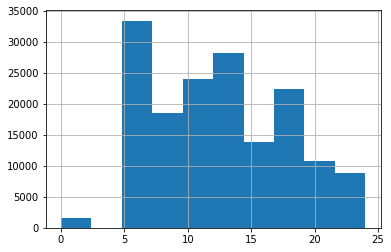

In [82]:
df_flights['dep_time'].hist(label='all')
plt.show()

## 1.17  Step 17 Examine the Nan Values x columns

    TIPS : check documentation! https://pandas.pydata.org/pandas-docs/stable/user_guide/missing_data.html

In [83]:
print(df_flights.isnull().sum())

year            0
month           0
day             0
dep_time      857
dep_delay     857
arr_time      988
arr_delay    1301
carrier         0
tailnum       248
flight          0
origin          0
dest            0
air_time     1301
distance        0
hour          857
minute        857
DayOfWeek     857
dtype: int64


# How visualize categorical variables in a proper way?

That's why it's always a good idea to investigate your raw dataset thoroughly and then think about cleaning it.

One of the most common ways to analyze the relationship between a categorical feature and a continuous feature is to plot a boxplot

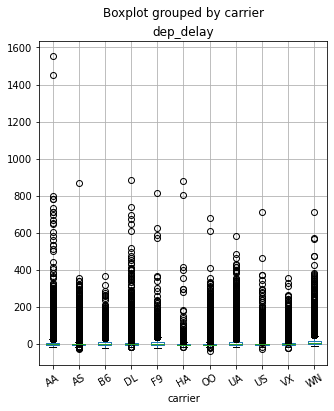

In [57]:
df_flights.boxplot('dep_delay','carrier',rot = 30,figsize=(5,6))

# Encoding Categorical Data!

- Replacing values
- Label Encoding
- One-Hot encoding
- Binary encoding


### Label Encoding for origin/departure


Another approach is to encode categorical values with a technique called "label encoding", which allows you to convert each value in a column to a number. Numerical labels are always between 0 and n_categories-1.

In [85]:
labels = df_flights['dest'].astype('category').cat.categories.tolist()

replace_map_comp = {'dest' : {k: v for k,v in zip(labels,list(range(1,len(labels)+1)))}}
df_flights.replace(replace_map_comp, inplace=True)

replace_map_comp = {'origin' : {k: v for k,v in zip(labels,list(range(1,len(labels)+1)))}}
df_flights.replace(replace_map_comp, inplace=True)

# looking for easier way? --> from sklearn.preprocessing import LabelEncoder

In [59]:
df_flights.head()

,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time,distance,hour,minute,DayOfWeek
Date,,,,,,,,,,,,,,,,,
2014-01-01 00:01:00,2014,1,1,1.0,96.0,235.0,70.0,AS,N508AS,145,53,2,194.0,1542,0.0,1.0,2.0
2014-01-01 00:04:00,2014,1,1,4.0,-6.0,738.0,-23.0,US,N195UW,1830,62,13,252.0,2279,0.0,4.0,2.0
2014-01-01 00:08:00,2014,1,1,8.0,13.0,548.0,-4.0,UA,N37422,1609,53,30,201.0,1825,0.0,8.0,2.0
2014-01-01 00:28:00,2014,1,1,28.0,-2.0,800.0,-23.0,US,N547UW,466,53,13,251.0,2282,0.0,28.0,2.0
2014-01-01 00:34:00,2014,1,1,34.0,44.0,325.0,43.0,AS,N762AS,121,62,2,201.0,1448,0.0,34.0,2.0


In [84]:
# You can try also with carrier, your choice

labels = df_flights['carrier'].astype('category').cat.categories.tolist()

replace_map_comp = {'carrier' : {k: v for k,v in zip(labels,list(range(1,len(labels)+1)))}}
df_flights.replace(replace_map_comp, inplace=True)

### One-Hot Encoding for carrier

The basic strategy is to convert each category value into a new column and assign a 1 or 0 (True/False) value to the column

In [62]:
df_flights = pd.get_dummies(df_flights, columns=['carrier'],
                                       prefix = ['carrier'])

df_flights.head()

,year,month,day,dep_time,dep_delay,arr_time,arr_delay,tailnum,flight,origin,dest,air_time,distance,hour,minute,DayOfWeek,carrier_1,carrier_2,carrier_3,carrier_4,carrier_5,carrier_6,carrier_7,carrier_8,carrier_9,carrier_10,carrier_11
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,
2014-01-01 00:01:00,2014,1,1,1.0,96.0,235.0,70.0,N508AS,145,53,2,194.0,1542,0.0,1.0,2.0,0,1,0,0,0,0,0,0,0,0,0
2014-01-01 00:04:00,2014,1,1,4.0,-6.0,738.0,-23.0,N195UW,1830,62,13,252.0,2279,0.0,4.0,2.0,0,0,0,0,0,0,0,0,1,0,0
2014-01-01 00:08:00,2014,1,1,8.0,13.0,548.0,-4.0,N37422,1609,53,30,201.0,1825,0.0,8.0,2.0,0,0,0,0,0,0,0,1,0,0,0
2014-01-01 00:28:00,2014,1,1,28.0,-2.0,800.0,-23.0,N547UW,466,53,13,251.0,2282,0.0,28.0,2.0,0,0,0,0,0,0,0,0,1,0,0
2014-01-01 00:34:00,2014,1,1,34.0,44.0,325.0,43.0,N762AS,121,62,2,201.0,1448,0.0,34.0,2.0,0,1,0,0,0,0,0,0,0,0,0


### Clean unuseful variables

In [63]:
del df_flights['year']
del df_flights['day']
del df_flights['tailnum']
del df_flights['flight']
del df_flights['air_time']
del df_flights['hour']
del df_flights['minute']

df_flights.head()

,month,dep_time,dep_delay,arr_time,arr_delay,origin,dest,distance,DayOfWeek,carrier_1,carrier_2,carrier_3,carrier_4,carrier_5,carrier_6,carrier_7,carrier_8,carrier_9,carrier_10,carrier_11
Date,,,,,,,,,,,,,,,,,,,,
2014-01-01 00:01:00,1,1.0,96.0,235.0,70.0,53,2,1542,2.0,0,1,0,0,0,0,0,0,0,0,0
2014-01-01 00:04:00,1,4.0,-6.0,738.0,-23.0,62,13,2279,2.0,0,0,0,0,0,0,0,0,1,0,0
2014-01-01 00:08:00,1,8.0,13.0,548.0,-4.0,53,30,1825,2.0,0,0,0,0,0,0,0,1,0,0,0
2014-01-01 00:28:00,1,28.0,-2.0,800.0,-23.0,53,13,2282,2.0,0,0,0,0,0,0,0,0,1,0,0
2014-01-01 00:34:00,1,34.0,44.0,325.0,43.0,62,2,1448,2.0,0,1,0,0,0,0,0,0,0,0,0


In [86]:
print("Before : {}".format(df_flights.isnull().mean() * 100))

df_flights["dep_delay"].fillna(0, inplace = True) 
df_flights["arr_delay"].fillna(0, inplace = True) 

print("After : {}".format(df_flights.isnull().mean() * 100))

Before : year         0.000000
month        0.000000
day          0.000000
dep_time     0.528852
dep_delay    0.528852
arr_time     0.609692
arr_delay    0.802844
carrier      0.000000
tailnum      0.153040
flight       0.000000
origin       0.000000
dest         0.000000
air_time     0.802844
distance     0.000000
hour         0.528852
minute       0.528852
DayOfWeek    0.528852
dtype: float64
After : year         0.000000
month        0.000000
day          0.000000
dep_time     0.528852
dep_delay    0.000000
arr_time     0.609692
arr_delay    0.000000
carrier      0.000000
tailnum      0.153040
flight       0.000000
origin       0.000000
dest         0.000000
air_time     0.802844
distance     0.000000
hour         0.528852
minute       0.528852
DayOfWeek    0.528852
dtype: float64


In [87]:
df_flights.dropna(inplace=True)
print("After : {}".format(df_flights.isnull().mean() * 100))
print(df_flights.shape)

After : year         0.0
month        0.0
day          0.0
dep_time     0.0
dep_delay    0.0
arr_time     0.0
arr_delay    0.0
carrier      0.0
tailnum      0.0
flight       0.0
origin       0.0
dest         0.0
air_time     0.0
distance     0.0
hour         0.0
minute       0.0
DayOfWeek    0.0
dtype: float64
(160748, 17)


## Data Splitting

In [114]:
del df_flights['tailnum']

X=df_flights.drop(columns='arr_delay')
Y=df_flights['arr_delay']

X_train,X_test,Y_train,Y_test=model_selection.train_test_split(X,Y,test_size=0.30, shuffle=True)
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(112523, 15) (48225, 15) (112523,) (48225,)


In [94]:
X_train.head()

,year,month,day,dep_time,dep_delay,arr_time,carrier,flight,origin,dest,air_time,distance,hour,minute,DayOfWeek
Date,,,,,,,,,,,,,,,
2014-05-20 05:12:00,2014,5,20,5.0,-3.0,709.0,8,1424,62,63,99.0,679,5.0,12.0,1.0
2014-06-17 10:32:00,2014,6,17,10.0,-3.0,1410.0,2,672,62,17,132.0,1024,10.0,32.0,1.0
2014-09-03 07:08:00,2014,9,3,7.0,8.0,1353.0,4,822,62,19,206.0,1927,7.0,8.0,2.0
2014-05-15 20:48:00,2014,5,15,20.0,-2.0,2307.0,2,598,53,59,121.0,933,20.0,48.0,3.0
2014-09-22 17:52:00,2014,9,22,17.0,-8.0,2001.0,7,3462,53,51,118.0,838,17.0,52.0,0.0


### Scaler

In [95]:
scalar=StandardScaler()
X_train=scalar.fit_transform(X_train)
X_test=scalar.fit_transform(X_test)

### Linear Model

In [96]:
from sklearn.linear_model import LinearRegression

# Fitting the model
flight_model = LinearRegression()
flight_model.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## Evaluate

In [97]:
flight_r2 = flight_model.score(X_test, Y_test)
print('R^2: {0}'.format(flight_r2))

## EVALUATE ALSO OTHER METRICS!!! PLS

R^2: 0.8972706015695907


Feature: 0, Score: 0.00000
Feature: 1, Score: 0.26723
Feature: 2, Score: 0.07810
Feature: 3, Score: -0.34366
Feature: 4, Score: 29.17443
Feature: 5, Score: 0.46276
Feature: 6, Score: -0.95395
Feature: 7, Score: 0.63556
Feature: 8, Score: 0.09037
Feature: 9, Score: -0.24869
Feature: 10, Score: 37.01145
Feature: 11, Score: -38.26259
Feature: 12, Score: -0.34366
Feature: 13, Score: -0.05654
Feature: 14, Score: -0.05149


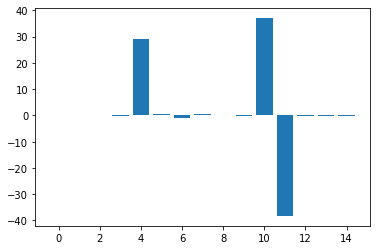

Index(['year', 'month', 'day', 'dep_time', 'dep_delay', 'arr_time', 'carrier',
       'flight', 'origin', 'dest', 'air_time', 'distance', 'hour', 'minute',
       'DayOfWeek'],
      dtype='object')


In [98]:
importance = flight_model.coef_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

print(X.columns)

## Do you want a smarter way? Pipelining!



In [109]:
from sklearn.compose import ColumnTransformer

numeric_features = df_flights.columns.values.tolist()
numeric_transformer = Pipeline(steps=[('scaler', StandardScaler())])


preprocessor = ColumnTransformer(
    transformers=[
                  ('num', numeric_transformer, numeric_features)])


lin = LinearRegression()

linear_reg = Pipeline([('preprocessor', preprocessor), 
                ('lin',lin)])